In [176]:
import tensorflow as tf
import numpy as np
import sklearn

In [177]:
np.__version__

'1.18.5'

In [2]:
hello= tf.constant("hello world")

In [3]:
sess = tf.Session()

In [4]:
print(sess.run(hello))

b'hello world'


# operation

In [5]:
class Operation():
    
    def __init__(self,input_nodes = []):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
    
    def compute(self):
        pass

In [6]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var

In [7]:
class multiply(Operation):
    
    def __init__(self,a,b):
        super().__init__([a,b])
        
    def compute(self,a_var,b_var):
        self.inputs = [a_var , b_var]
        return a_var * b_var

In [8]:
class matmul(Operation):
    
    def __init__(self,a,b):
        super().__init__([a,b])
        
    def compute(self,a_var,b_var):
        self.inputs = [a_var,b_var]
        return a_var.dot(b_var)

In [9]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [10]:
class Variable():
    
    def __init__(self,initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [11]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.variables = []
        self.placeholders = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

Z = Ax + b

In [12]:
g = Graph()

In [13]:
g.set_as_default()

In [14]:
A = Variable(10)

In [15]:
b = Variable(1)

In [16]:
x = Placeholder()

In [17]:
y = multiply(A,x)

In [18]:
z = add(y,b)

## Transversing Operation nodes

In [19]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [20]:
class Session():
    
    def run(self,operation,feed_dict= {}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node)== Placeholder:
                
                node.output = feed_dict[node]
            
            elif type(node)== Variable:
                node.output = node.value
                
            else:
                
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output
                

In [21]:
sess = Session()

In [22]:
result =sess.run(operation = z, feed_dict={x:10})

In [23]:
result

101

In [24]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2])

x = Placeholder()

y = matmul(A,x)

z= add(y ,b)

In [25]:
sess = Session()

sess.run(operation=z, feed_dict={x:10})

array([[101, 202],
       [301, 402]])

# Classifiction Problem

## Activation Function

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [28]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

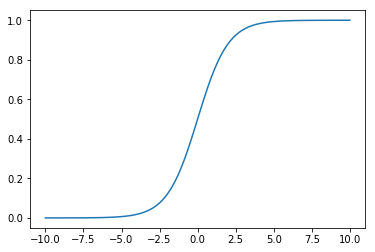

In [29]:
plt.plot(sample_z,sample_a)

In [30]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        
        super.__init__([z])
    
    def compute(self,z_val):
        return 1/(1 + np.exp(-z_val))

# tensorflow Basics

In [31]:
import tensorflow as tf

In [32]:
print(tf.__version__)

1.3.0


In [33]:
hello = tf.constant("hello")

In [34]:
world = tf.constant(" world")

In [35]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [36]:
print(hello)

Tensor("Const_1:0", shape=(), dtype=string)


In [37]:
with tf.Session() as sess:
    result = sess.run(hello + world)

In [38]:
print(result)

b'hello world'


In [39]:
a = tf.constant(10)

In [40]:
b = tf.constant(20)

In [41]:
with tf.Session() as sess:
    result =sess.run(a + b)

In [42]:
print(result)

30


In [43]:
fill_mat = tf.fill((3,3),4)

In [44]:
myzeroes = tf.zeros((3,3))

In [45]:
myones = tf.ones((4,4))

In [46]:
myrandn = tf.random_normal((3,3),mean=0, stddev=1.0)

In [47]:
myrandu = tf.random_uniform((3,3),minval=0, maxval=1)

In [48]:
my_ops = [fill_mat,myzeroes,myones,myrandn,myrandu]

In [49]:
sess = tf.InteractiveSession()

In [50]:
for op in my_ops:
    print(sess.run(op))
    print("\n")

[[4 4 4]
 [4 4 4]
 [4 4 4]]


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[-0.20731924 -0.5147365   1.0635543 ]
 [-1.5680622  -0.5177381   0.7054109 ]
 [ 2.2379978  -0.22874221  1.1099347 ]]


[[0.7524055  0.67845345 0.41881835]
 [0.1826315  0.33035016 0.52842474]
 [0.73666716 0.16931808 0.0689162 ]]




In [51]:
a = tf.constant([[1,2],[3,4]])

In [52]:
b = tf.constant([[100],[200]])

In [53]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [54]:
result = tf.matmul(a,b)

In [55]:
sess.run(result)

array([[ 500],
       [1100]])

In [56]:
result.eval()

array([[ 500],
       [1100]])

# TF Graphs

In [57]:
n1 = tf.constant(1)

In [58]:
n2 = tf.constant(2)

In [59]:
n3 = n1 + n2

In [60]:
with tf.Session() as sess:
    result = sess.run(n3)

In [61]:
result

3

In [62]:
print(tf.get_default_graph())

In [63]:
g = tf.Graph()

In [64]:
print(g)

In [65]:
graph_one = tf.get_default_graph()

In [66]:
print(graph_one)

In [67]:
graph_two = tf.Graph()

In [68]:
graph_two

In [69]:
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


# Variables and Placeholders

In [71]:
sess = tf.InteractiveSession()

In [72]:
my_tensor = tf.random_uniform((4,4),minval=0,maxval=1)

In [73]:
my_var = tf.Variable(initial_value=my_tensor)

In [74]:
init = tf.global_variables_initializer()

In [75]:
sess.run(init)

In [76]:
sess.run(my_var)

array([[0.7413299 , 0.47632134, 0.8605474 , 0.559682  ],
       [0.24229372, 0.47879922, 0.48523033, 0.07667792],
       [0.5793414 , 0.7376263 , 0.98964095, 0.96361995],
       [0.5135331 , 0.7841798 , 0.92618203, 0.83932817]], dtype=float32)

In [79]:
ph = tf.placeholder(tf.float32,shape=(None,5))

In [80]:
np.random.seed(101)
tf.set_random_seed(101)

In [81]:
rand_a = np.random.uniform(0,100,(5,5))

In [82]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [83]:
rand_b = np.random.uniform(0,100,(5,1))

In [84]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [85]:
a = tf.placeholder(tf.float32)

In [86]:
b = tf.placeholder(tf.float32)

In [87]:
add_op = a + b

In [88]:
mul_op = a * b

In [92]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Example Neural Network

In [93]:
n_features = 10
n_dense_neurons = 3

In [94]:
x = tf.placeholder(tf.float32,(None,n_features))

In [96]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [97]:
xW = tf.matmul(x,W)

In [98]:
z = tf.add(xW,b)

In [99]:
init = tf.global_variables_initializer()

In [100]:
with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={a:np.random.random([1,n_features])})

In [101]:
print(layer_out)

[[0.9131535  0.80792016 0.40299782 0.35722435 0.9528767  0.34363157
  0.8650998  0.83027774 0.53816146 0.9224694 ]]


## Simple Regression Example

In [103]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [106]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

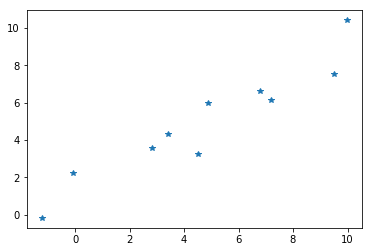

In [108]:
plt.plot(x_data,y_label,'*')

y = mx + b

In [117]:
np.random.rand(2)

array([0.6517677 , 0.42456894])

In [118]:
m = tf.Variable(0.81)
b = tf.Variable(0.67)

In [119]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b
    
    error += (y - y_hat) **2
        

In [120]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [121]:
init = tf.global_variables_initializer()

In [125]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

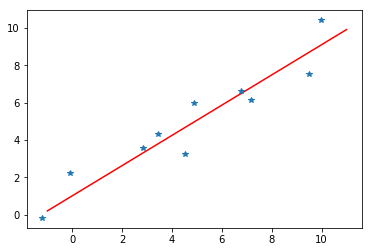

In [126]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

In [127]:
import pandas as pd

In [128]:
 x_data = np.linspace(0.0,10.0,100000)

In [130]:
noise = np.random.randn(len(x_data))

y = mx + b

b = 5

In [131]:
y_true = 0.5 * x_data + 5 + noise

In [132]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [133]:
y_df = pd.DataFrame(data= y_true, columns=['Y'])

In [136]:
my_data = pd.concat([x_df,y_df],axis = 1)

In [138]:
my_data.head()

,X Data,Y
0,0.0000,4.405214
1,0.0001,5.647943
2,0.0002,4.995218
3,0.0003,5.267583
4,0.0004,4.159308


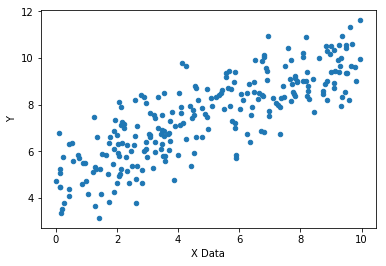

In [142]:
my_data.sample(n=250).plot(kind = 'scatter', x= 'X Data',y = 'Y')

In [143]:
batch_size = 8

In [144]:
np.random.randn(2)

array([-1.09360941, -0.39343972])

In [147]:
m = tf.Variable(1.09)
b = tf.Variable(0.39)

In [148]:
xph = tf.placeholder(tf.float32,[batch_size])

In [149]:
yph = tf.placeholder(tf.float32,[batch_size])

In [150]:
y_model = m* xph + b 

In [151]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [152]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [153]:
init = tf.global_variables_initializer()

In [162]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict= feed)
        
    model_m , model_b = sess.run([m,b])

In [163]:
model_m

0.53279185

In [164]:
model_b

4.97479

In [165]:
y_hat = x_data * model_m + model_b

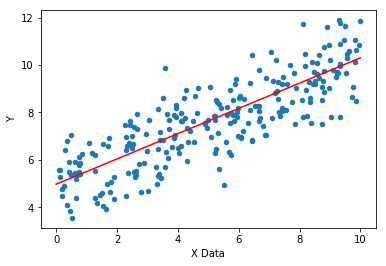

In [166]:
my_data.sample(n=250).plot(kind = 'scatter', x= 'X Data',y= 'Y')
plt.plot(x_data,y_hat,'r')

## TF Estimator

In [168]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [169]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_session_config': None, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmplh9ttuek', '_save_checkpoints_steps': None}


In [178]:
from sklearn.model_selection import train_test_split

In [181]:
X_train,X_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [184]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,
                                                num_epochs=None,shuffle=True)

In [185]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,
                                                      num_epochs=1000,shuffle=False)

In [190]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_eval},y_eval,batch_size=8,
                                                      num_epochs=1000,shuffle=False)

In [187]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Lenovo\AppData\Local\Temp\tmplh9ttuek\model.ckpt.
INFO:tensorflow:loss = 434.75073, step = 1
INFO:tensorflow:global_step/sec: 1678.06
INFO:tensorflow:loss = 25.096504, step = 101 (0.060 sec)
INFO:tensorflow:global_step/sec: 1817.78
INFO:tensorflow:loss = 27.33326, step = 201 (0.055 sec)
INFO:tensorflow:global_step/sec: 1785.33
INFO:tensorflow:loss = 19.873833, step = 301 (0.056 sec)
INFO:tensorflow:global_step/sec: 1785.3
INFO:tensorflow:loss = 12.341004, step = 401 (0.056 sec)
INFO:tensorflow:global_step/sec: 2040.36
INFO:tensorflow:loss = 16.382198, step = 501 (0.050 sec)
INFO:tensorflow:global_step/sec: 1817.81
INFO:tensorflow:loss = 10.429891, step = 601 (0.054 sec)
INFO:tensorflow:global_step/sec: 1851.37
INFO:tensorflow:loss = 7.7196546, step = 701 (0.054 sec)
INFO:tensorflow:global_step/sec: 1999.61
INFO:tensorflow:loss = 8.092369, step = 801 (0.050 sec)
INFO:tensorflow:global_step

In [ ]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

In [ ]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

In [192]:
print("training data metrics")
print(train_metrics)

training data metrics
{'loss': 8.561963, 'average_loss': 1.0702454, 'global_step': 1000}


In [193]:
print("eval data metrics ")
print(eval_metrics)

eval data metrics 
{'loss': 8.561963, 'average_loss': 1.0702454, 'global_step': 1000}


In [196]:
brand_new_data = np.linspace(0,10,10)

In [197]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},
                                                     shuffle = False)

In [199]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmplh9ttuek\model.ckpt-1000


[{'predictions': array([4.4861984], dtype=float32)},
 {'predictions': array([5.133191], dtype=float32)},
 {'predictions': array([5.780184], dtype=float32)},
 {'predictions': array([6.4271765], dtype=float32)},
 {'predictions': array([7.074169], dtype=float32)},
 {'predictions': array([7.721162], dtype=float32)},
 {'predictions': array([8.368155], dtype=float32)},
 {'predictions': array([9.015147], dtype=float32)},
 {'predictions': array([9.66214], dtype=float32)},
 {'predictions': array([10.309134], dtype=float32)}]

In [200]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmplh9ttuek\model.ckpt-1000


In [201]:
predictions

[array([4.4861984], dtype=float32),
 array([5.133191], dtype=float32),
 array([5.780184], dtype=float32),
 array([6.4271765], dtype=float32),
 array([7.074169], dtype=float32),
 array([7.721162], dtype=float32),
 array([8.368155], dtype=float32),
 array([9.015147], dtype=float32),
 array([9.66214], dtype=float32),
 array([10.309134], dtype=float32)]

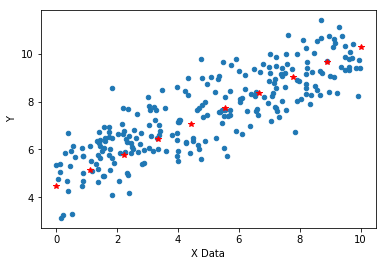

In [205]:
my_data.sample(n=250).plot(kind= 'scatter',x = 'X Data', y = 'Y')
plt.plot(brand_new_data,predictions,'r*')